# QF 600 Asset Pricing | YU Lingfeng
## `Project 1` | Efficient Frontier

### <font color = green> Activation of necessary libraries. </font>

In [98]:
import pandas as pd
import numpy as np
# !pip install matplotlib
# !pip install --upgrade openpyxl
import matplotlib.pyplot as plt
from datetime import datetime

from IPython.display import display
from IPython.display import Image

# !pip install nbconvert

In [99]:
%whos

Variable          Type         Data/Info
----------------------------------------
Eff_row           list         n=22
Image             type         <class 'IPython.core.display.Image'>
Ine_row           list         n=22
R                 ndarray      10: 10 elems, type `float64`, 80 bytes
R_prime           ndarray      10: 10 elems, type `float64`, 80 bytes
Rf                float        0.13
Rmv               float64      1.0040443340832619
Rp                ndarray      41: 41 elems, type `float64`, 328 bytes
Rtg               float64      1.4862735358446912
V                 ndarray      10x10: 100 elems, type `float64`, 800 bytes
V_inv             ndarray      10x10: 100 elems, type `float64`, 800 bytes
Var               ndarray      41: 41 elems, type `float64`, 328 bytes
alpha             float64      0.1379432386993189
ax                Axes         Axes(0.125,0.11;0.775x0.77)
col_list          list         n=11
data              DataFrame              Date  NoDur  Du<...>\n[1

### <font color = "blue"> `IMPORT` dataset: `Industry_Portfolios.xlsx`. </font> 
### <font color = "blue"> Validate dataset

In [100]:
file_path = 'Industry_Portfolios.csv'
data = pd.read_csv(file_path)
data

,Date,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
0,200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
1,200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16
2,200403,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63
3,200404,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76
4,200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86
...,...,...,...,...,...,...,...,...,...,...,...
115,201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
116,201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
117,201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87
118,201311,1.29,1.81,2.95,0.85,3.65,0.27,3.67,4.54,-1.81,4.74


In [101]:
type(data)

pandas.core.frame.DataFrame

In [102]:
data.isnull().sum()

Date     0
NoDur    0
Durbl    0
Manuf    0
Enrgy    0
HiTec    0
Telcm    0
Shops    0
Hlth     0
Utils    0
Other    0
dtype: int64

In [103]:
data.dtypes

Date       int64
NoDur    float64
Durbl    float64
Manuf    float64
Enrgy    float64
HiTec    float64
Telcm    float64
Shops    float64
Hlth     float64
Utils    float64
Other    float64
dtype: object

In [104]:
data['Date'] = data['Date'].apply(lambda x: datetime(x // 100, x % 100, 1))

In [105]:
data.dtypes

Date     datetime64[ns]
NoDur           float64
Durbl           float64
Manuf           float64
Enrgy           float64
HiTec           float64
Telcm           float64
Shops           float64
Hlth            float64
Utils           float64
Other           float64
dtype: object

In [106]:
data['Date'][1].month

2

In [107]:
data.iloc[:,1:].mean()

NoDur    0.902833
Durbl    0.733333
Manuf    1.012833
Enrgy    1.231167
HiTec    0.766250
Telcm    0.881417
Shops    0.916333
Hlth     0.783833
Utils    0.907167
Other    0.489083
dtype: float64

#### Question 1. Use these returns to estimate the vector of mean returns and the covariance matrix of returns for the ten industry portfolios.

In [108]:
col_list = list(data.columns)
col_list

['Date',
 'NoDur',
 'Durbl',
 'Manuf',
 'Enrgy',
 'HiTec',
 'Telcm',
 'Shops',
 'Hlth',
 'Utils',
 'Other']

#### Question 1.1 Create a table showing the mean return and standard deviation of return for the ten industry portfolios.

In [109]:
rt_matrix = data.iloc[:, 1:].to_numpy()
rt_matrix

array([[ 0.06, -1.07, -0.62, ...,  3.09,  1.92,  2.88],
       [ 4.25, -0.07,  1.95, ...,  0.89,  2.07,  2.16],
       [-0.09, -1.15, -0.27, ..., -3.96,  1.13, -0.63],
       ...,
       [ 4.75,  0.72,  4.56, ...,  3.47,  3.35,  3.87],
       [ 1.29,  1.81,  2.95, ...,  4.54, -1.81,  4.74],
       [ 2.65,  1.18,  3.13, ...,  0.71,  1.79,  3.11]])

In [110]:
rt_matrix.shape

(120, 10)

In [111]:
len(rt_matrix)

120

In [112]:
rt_matrix[0,:]

array([ 0.06, -1.07, -0.62,  0.44,  4.53,  1.41,  0.45,  3.09,  1.92,
        2.88])

In [113]:
data['NoDur'].mean()

0.9028333333333334

In [114]:
num_sample = len(data)
num_sample

120

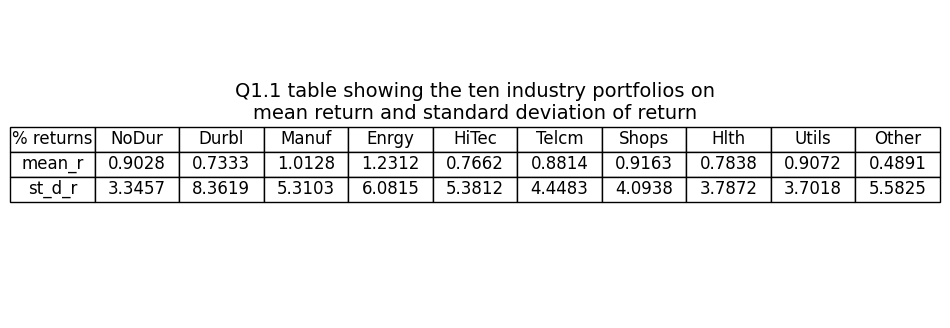

In [115]:
num_sample = len(data)
# Calculate the mean for each column
# axis=0, which specifies that we want to calculate the mean along the columns.
mean_return = np.mean(rt_matrix, axis=0)

# Calculate the variance for each column
# calculate the variance for each column using np.var() with axis=0
variance_return = np.var(rt_matrix, axis=0) * (num_sample / (num_sample - 1))

st_d_return = np.array([np.sqrt(x) for x in variance_return])

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 4))

# Create the table
table_data = []
header_row = ['% returns']
header_row.extend(col_list[1:])

table_data.append(header_row)

mean_row = ['mean_r'] + list(np.round(mean_return, decimals=4))

st_d_row = ['st_d_r'] + list(np.round(st_d_return, decimals=4))
table_data.append(mean_row)
table_data.append(st_d_row)

# Add a label above the table
label_text =\
        "Q1.1 table showing the ten industry portfolios on\n" +\
        "mean return and standard deviation of return"  
# Your label text
ax.text(0.5, 0.7, label_text, ha='center', va='center', fontsize=14)
table = ax.table(cellText=table_data, loc='center', cellLoc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)  # Adjust the height of the rows

# Remove axis
ax.axis('off')

# Show the table
plt.show()
fig.savefig("table1_1.png")

In [116]:
mean_return

array([0.90283333, 0.73333333, 1.01283333, 1.23116667, 0.76625   ,
       0.88141667, 0.91633333, 0.78383333, 0.90716667, 0.48908333])

In [117]:
variance_return

array([11.19342216, 69.92057703, 28.19897006, 36.98493308, 28.95722027,
       19.78722739, 16.75908392, 14.34266922, 13.70305241, 31.16377142])

In [118]:
st_d_return

array([3.34565721, 8.36185249, 5.31027024, 6.08152391, 5.38119134,
       4.44828365, 4.09378601, 3.78717166, 3.70176342, 5.5824521 ])

#### Question 1.2 Plot the minimum-variance frontier (without the riskless asset) generated by the ten industry portfolios.

In [119]:
# Calculate the variance-covariance matrix
# Setting rowvar=False means that each column represents a variable (asset), 
# and each row represents an observation (sample).
V = np.cov(rt_matrix, rowvar=False)
# Calculate the V-inverse
V_inv = np.linalg.inv(V)

# Calculate the R-prime (transpose)
R_prime = mean_return
R = np.transpose(R_prime)
# create the unit vector e
e_prime = np.ones(len(col_list) - 1)
e = e_prime.T

In [120]:
V.shape

(10, 10)

In [121]:
R_prime == mean_return

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [122]:
alpha = R_prime @ V_inv @ e
zeta = R_prime @ V_inv @ R
delta = np.dot(np.dot(e_prime, V_inv), e)
(alpha, zeta, delta)

(0.1379432386993189, 0.19640858464482275, 0.1373875973567117)

In [123]:
Rmv = alpha / delta
Rp = np.arange(0, 2.05, 0.05)
Var = (1 / delta) + (delta / (zeta * delta - alpha ** 2) ) * ((Rp - Rmv) ** 2)
st_d = Var ** 0.5

In [124]:
Var[:11]

array([24.68757549, 22.9968704 , 21.39250996, 19.8744942 , 18.44282309,
       17.09749666, 15.83851488, 14.66587777, 13.57958533, 12.57963755,
       11.66603444])

In [125]:
len(Rp) == len(st_d)

True

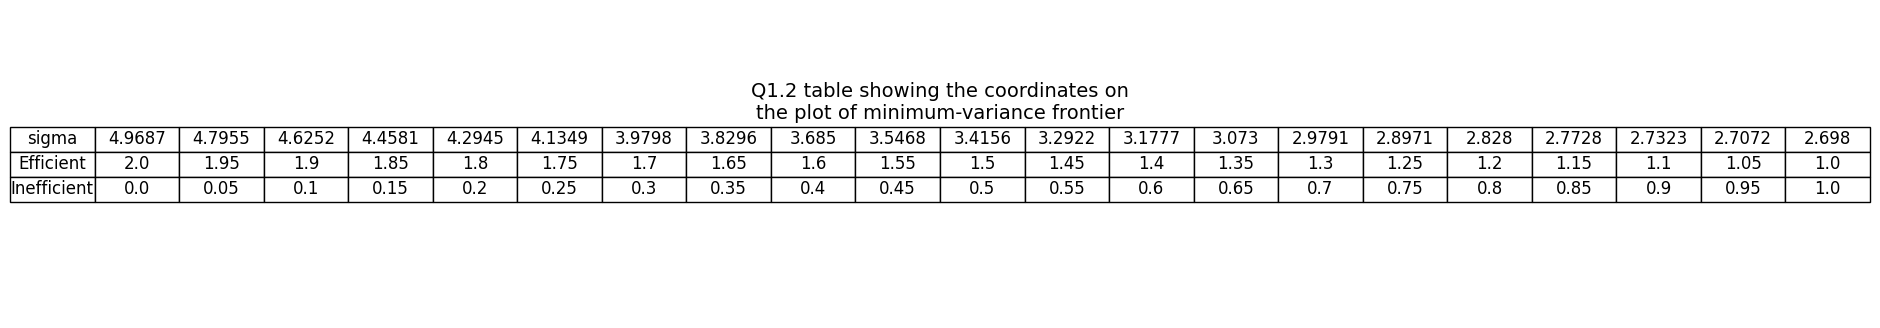

In [126]:
# Create the table
partition = (len(st_d)) // 2


# Create a figure and axis
fig, ax = plt.subplots(figsize=(24, 4))


table_data = []
header_row = ['sigma']
header_row.extend(list(np.round(st_d[:partition+1], decimals=4)))

table_data.append(header_row)

Eff_row = ['Efficient'] + list(np.round(Rp[partition:], decimals=4))[::-1]

Ine_row = ['Inefficient'] + list(np.round(Rp[:partition+1], decimals=4))
table_data.append(Eff_row)
table_data.append(Ine_row)

# Add a label above the table
label_text =\
"Q1.2 table showing the coordinates on\n" +\
"the plot of minimum-variance frontier"  
# Your label text
ax.text(0.5, 0.7, label_text, ha='center', va='center', fontsize=14)
table = ax.table(cellText=table_data, loc='center', cellLoc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)  # Adjust the height of the rows

# Remove axis
ax.axis('off')

# Show the table
plt.show()
fig.savefig("table1_2.png")

In [127]:
len(Rp[partition:])

21

In [128]:
Rp[partition:]

array([1.  , 1.05, 1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 ,
       1.55, 1.6 , 1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  ])

In [129]:
len(Rp[:partition+1])

21

In [130]:
len(st_d[:partition+1])

21

In [131]:
len(st_d)

41

In [132]:
len(Rp)

41

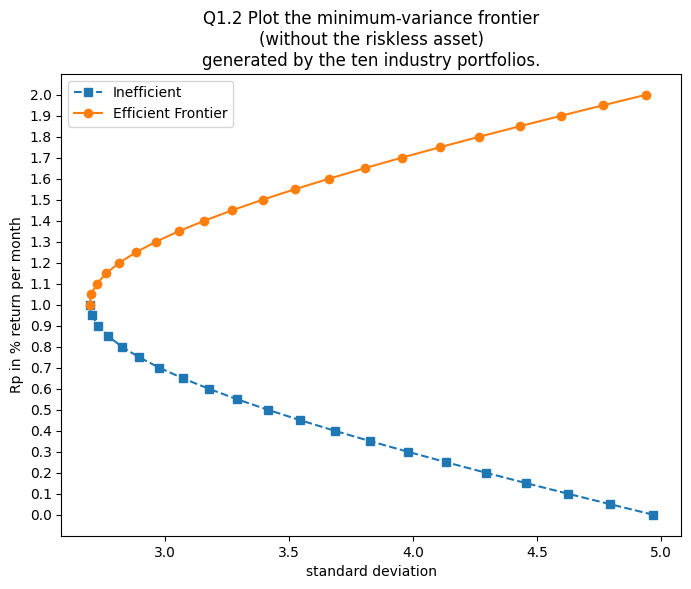

In [133]:
# Sample data (replace with your data)

plt.figure(figsize=(8, 6))
# Create a line plot for y1
plt.plot(st_d[:partition+1], Rp[:partition+1], label='Inefficient',
         marker='s', linestyle='--')

# Create a line plot for y2
plt.plot(st_d[partition:], Rp[partition:], label='Efficient Frontier',
         marker='o', linestyle='-')

# Add a title
plt.title(
    'Q1.2 Plot the minimum-variance frontier\n(without the riskless asset)\ngenerated by the ten industry portfolios.')
plt.yticks(np.arange(0, 2.1, 0.1))
# plt.xlim(0,5.5)
# Add labels and a legend
plt.xlabel('standard deviation')
plt.ylabel('Rp in % return per month')
plt.legend()

plt.savefig('fig1_2.png')
# Show the plot
plt.show()


#### Q1.3 Briefly explain the economic significance and relevance of the minimum-variance frontier to an investor

#### Ans: 
#### 1. Risk-Return Tradeoff: investors must decide how much risk they are willing to take on to achieve their desired level of return.
#### 2. Efficient Portfolios: a subset of efficient portfolios, which are portfolios that offer the highest expected return for a given level of risk or the lowest risk for a given level of return. Investors aim to construct portfolios on this frontier because they represent the best risk-return tradeoffs available.

#### Question 2. Now suppose that the (net) risk-free rate is 0.13% per month.

#### Q2.1 Plot the efficient frontier (with the riskless asset) on the same graph as the minimum-variance frontier generated by the ten industry portfolios.

In [134]:
Rf = 0.13
# name sigma_p for differentiate with previous st_d
sigma_p = (Rp - Rf) / ((zeta - 2 * alpha * Rf + delta * (Rf**2)) ** 0.5)

In [135]:
type(sigma_p)

numpy.ndarray

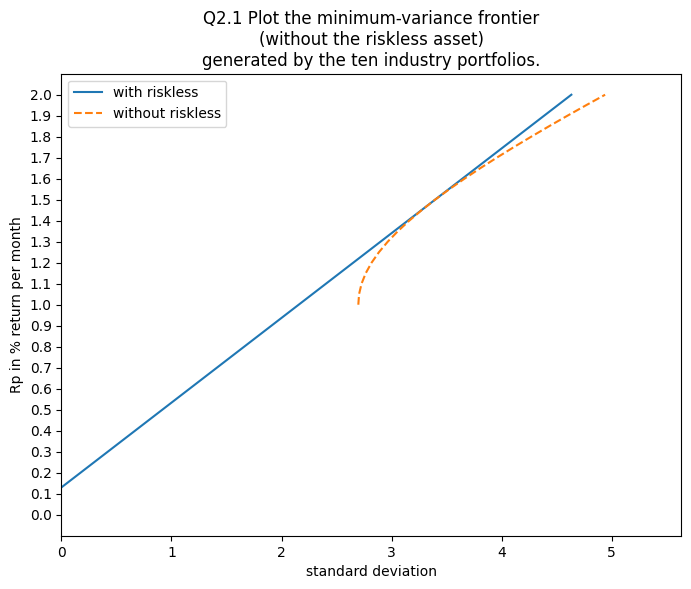

In [136]:
# Sample data (replace with your data)
partition = (len(st_d)) // 2

plt.figure(figsize=(8, 6))
# Create a line plot for y1
plt.plot(sigma_p, Rp, label='with riskless', linestyle='-')

# Create a line plot for y2
plt.plot(st_d[partition:], Rp[partition:], label='without riskless', linestyle='--')

# Set the x-axis limits to trim from the left side
plt.xlim(0, max(sigma_p) + 1)  # Adjust max(x) as needed for the right limit

# Add a title
plt.title(
    'Q2.1 Plot the minimum-variance frontier\n(without the riskless asset)\ngenerated by the ten industry portfolios.')
plt.yticks(np.arange(0, 2.1, 0.1))
# plt.xlim(0, 5.5)
# Add labels and a legend
plt.xlabel('standard deviation')
plt.ylabel('Rp in % return per month')
plt.legend()
plt.savefig('fig2_1.png')
# Show the plot
plt.show()


#### Q2.2 Briefly explain the economic significance and relevance of the efficient frontier to an investor.

#### Ans: 
#### 1. Optimal Risk-Return Tradeoff: The efficient frontier represents a set of portfolios that offer the highest expected return for a given level of risk or the lowest risk for a given level of return. It helps investors identify the optimal risk-return tradeoff for their investment objectives.
#### 2.	Asset Allocation: Asset managers and financial advisors use the principles of the efficient frontier to determine the optimal allocation of assets within a portfolio. This allocation strategy helps clients balance risk and return according to their investment preferences.

#### Q3 The two frontiers will intersect at single point: the tangency portfolio.

#### Q3.1 Calculate the Sharpe ratio for the tangency portfolio, and also the tangency portfolio weights for the ten industry portfolios.


In [137]:
# Sharp Ratio for tangency portfolio = (Rtg - Rf) / sigma_tg

sharp_ratio_tg = (zeta - 2 * alpha * Rf + delta * (Rf**2)) ** 0.5
sharp_ratio_tg

0.4035655993495088

In [138]:
Rtg = (alpha * Rf - zeta) / (delta * Rf - alpha)
Rtg

1.4862735358446912

In [139]:
# Weightage w* = a + b * Rp, on Lecture Notes 2 Page 12
w_star = ((delta * Rtg - alpha) / (zeta * delta - alpha ** 2)) * (V_inv @ R) +\
                ((zeta - alpha * Rtg) / (zeta * delta - alpha ** 2)) * (V_inv @ e)
w_star.sum()

1.0000000000000016

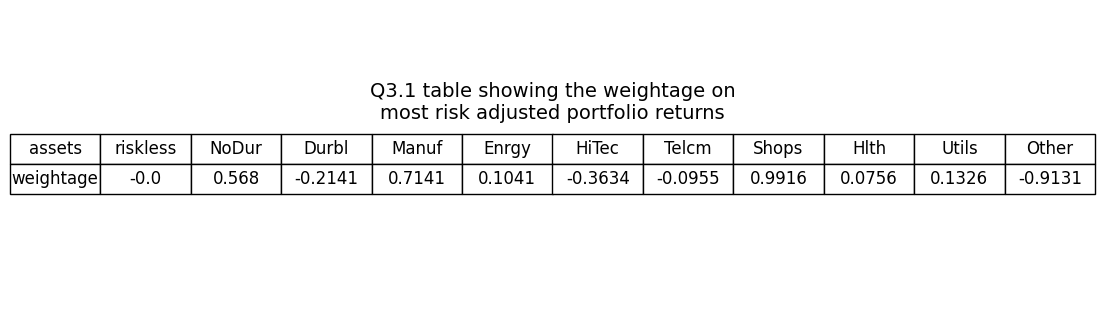

In [140]:
num_sample = len(data)
mean_return = np.mean(rt_matrix, axis=0)
variance_return = np.var(rt_matrix, axis=0) * (num_sample / (num_sample - 1))
st_d_return = np.array([np.sqrt(x) for x in variance_return])

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 4))

# Create the table
table_data = []
header_row = ['assets', 'riskless']
header_row.extend(col_list[1:])

table_data.append(header_row)

weight_row = ['weightage', np.round(1-w_star.sum(), decimals=4)] +\
                list(np.round(w_star, decimals=4))


table_data.append(weight_row)

# Add a label above the table
label_text = "Q3.1 table showing the weightage on\nmost risk adjusted portfolio returns"  # Your label text
ax.text(0.5, 0.7, label_text, ha='center', va='center', fontsize=14)
table = ax.table(cellText=table_data, loc='center', cellLoc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.8)  # Adjust the height of the rows

# Remove axis
ax.axis('off')

# Show the table
plt.show()
fig.savefig("table3_1.png")

#### Q3.2 Briefly explain the economic significance and relevance of the tangency portfolio to an investor.

#### Ans:
#### 1.	Maximum Risk-Adjusted Return: The tangency portfolio represents a portfolio that offers the highest risk-adjusted return, also known as the Sharpe ratio. It is the optimal portfolio for investors who aim to maximize their returns for a given level of risk or minimize their risk for a given level of return.
#### 2.	Asset Allocation: The tangency portfolio guides asset allocation decisions. It helps investors determine the ideal mix of asset classes (e.g., stocks and bonds) to maximize returns while managing risk. Asset managers and financial advisors use this concept to create portfolios that align with clients' financial goals and risk tolerance.
#### 3.	Tangency portfolio has no investment in riskless asset.

\newpage

## QF 600 Asset Pricing | YU Lingfeng
## `Project 1` | Efficient Frontier | Submission 4

#### Question 1. Use these returns to estimate the vector of mean returns and the covariance matrix of returns for the ten industry portfolios.

#### Question 1.1 Create a table showing the mean return and standard deviation of return for the ten industry portfolios.

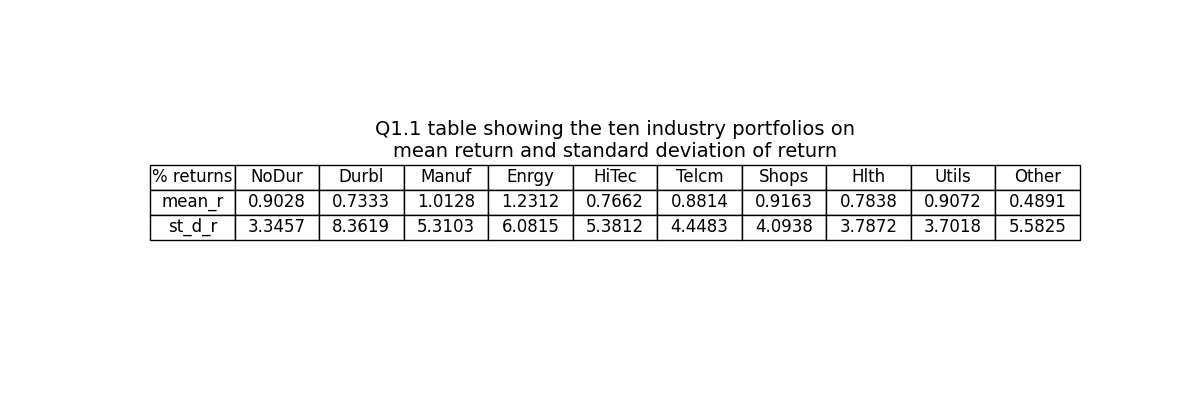

In [141]:
display(Image(filename="table1_1.png"))

#### Question 1.2 Plot the minimum-variance frontier (without the riskless asset) generated by the ten industry portfolios.

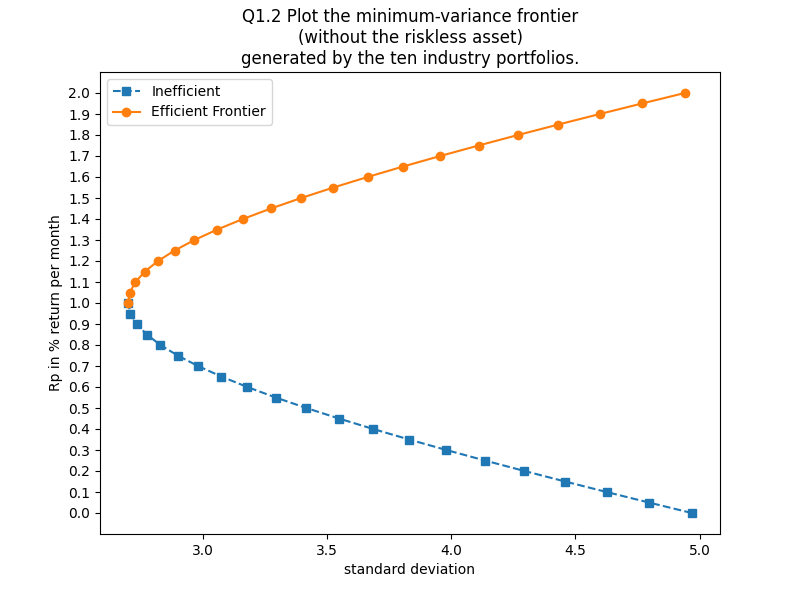

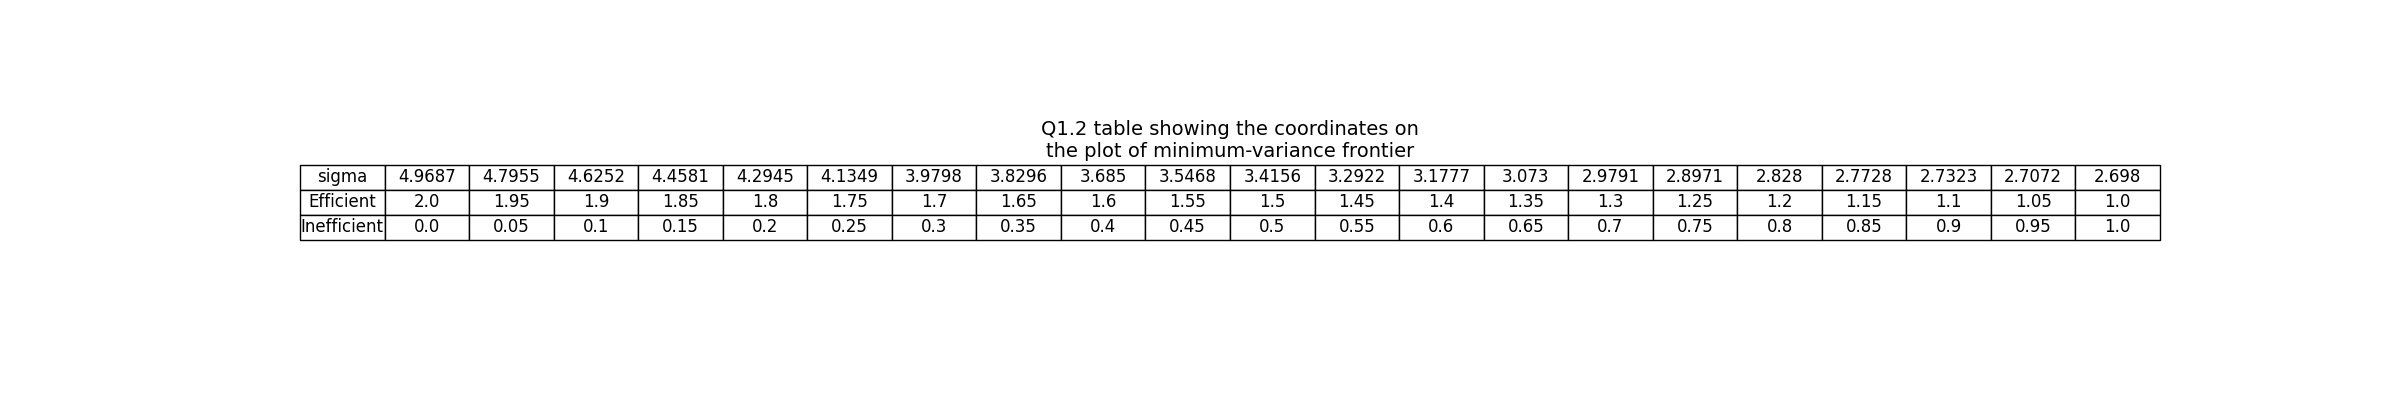

In [142]:
display(Image(filename="fig1_2.png"))
display(Image(filename="table1_2.png", width=4000, height=500))

#### Q1.3 Briefly explain the economic significance and relevance of the minimum-variance frontier to an investor

#### Ans: 
#### 1. Risk-Return Tradeoff: investors must decide how much risk they are willing to take on to achieve their desired level of return.
#### 2. Efficient Portfolios: a subset of efficient portfolios, which are portfolios that offer the highest expected return for a given level of risk or the lowest risk for a given level of return. Investors aim to construct portfolios on this frontier because they represent the best risk-return tradeoffs available.

#### Question 2. Now suppose that the (net) risk-free rate is 0.13% per month.

#### Q2.1 Plot the efficient frontier (with the riskless asset) on the same graph as the minimum-variance frontier generated by the ten industry portfolios.

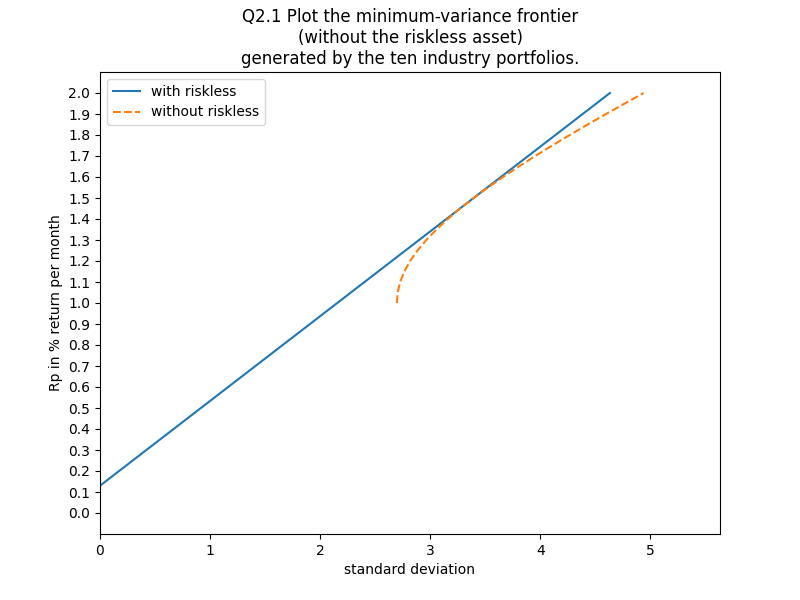

In [143]:
display(Image(filename="fig2_1.png"))

#### Q2.2 Briefly explain the economic significance and relevance of the efficient frontier to an investor.

#### Ans: 
#### 1. Optimal Risk-Return Tradeoff: The efficient frontier represents a set of portfolios that offer the highest expected return for a given level of risk or the lowest risk for a given level of return. It helps investors identify the optimal risk-return tradeoff for their investment objectives.
#### 2.	Asset Allocation: Asset managers and financial advisors use the principles of the efficient frontier to determine the optimal allocation of assets within a portfolio. This allocation strategy helps clients balance risk and return according to their investment preferences.

#### Q3 The two frontiers will intersect at single point: the tangency portfolio.

#### Q3.1 Calculate the Sharpe ratio for the tangency portfolio, and also the tangency portfolio weights for the ten industry portfolios.


Sharpe ratio for the tangency portfolio is 0.4035655993495088


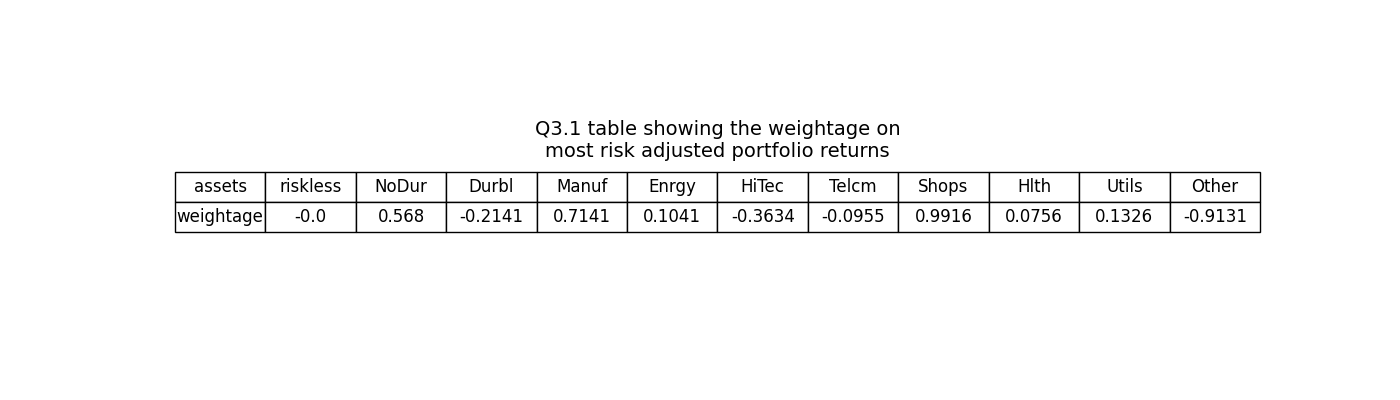

In [144]:
print('Sharpe ratio for the tangency portfolio is ' + str(sharp_ratio_tg))
display(Image(filename="table3_1.png"))

#### Q3.2 Briefly explain the economic significance and relevance of the tangency portfolio to an investor.

#### Ans:
#### 1.	Maximum Risk-Adjusted Return: The tangency portfolio represents a portfolio that offers the highest risk-adjusted return, also known as the Sharpe ratio. It is the optimal portfolio for investors who aim to maximize their returns for a given level of risk or minimize their risk for a given level of return.
#### 2.	Asset Allocation: The tangency portfolio guides asset allocation decisions. It helps investors determine the ideal mix of asset classes (e.g., stocks and bonds) to maximize returns while managing risk. Asset managers and financial advisors use this concept to create portfolios that align with clients' financial goals and risk tolerance.
#### 3.	Tangency portfolio has no investment in riskless asset.